In [29]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from mlxtend.preprocessing import shuffle_arrays_unison
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier

In [30]:
data = pd.read_csv("GESTOS_17-04-2018.csv")
labels_data = pd.read_csv("CLASES_17-04-2018.csv")

X = data.fillna(data.mean(), inplace=True)
X = data.values
y = labels_data.values

from sklearn.utils import shuffle

X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\RobertoAlejandro\Anaconda3\lib\site-package

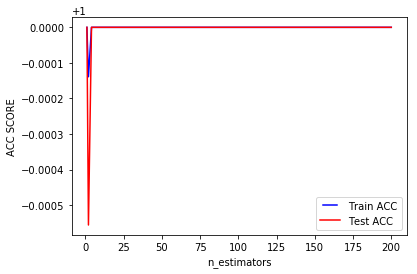

In [31]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    accuracy = accuracy_score(y_train,train_pred)
    train_results.append(accuracy)
    y_pred = rf.predict(X_test)
    accuracy2 = accuracy_score(y_test,y_pred)
    test_results.append(accuracy2)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train ACC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test ACC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('ACC SCORE')
plt.xlabel('n_estimators')
plt.show()

C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\RobertoAlejandro\Anaconda3\lib\si

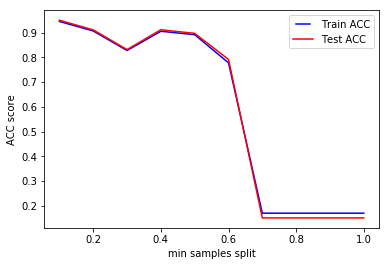

In [32]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    accuracy = accuracy_score(y_train,train_pred)
    train_results.append(accuracy)
    y_pred = rf.predict(X_test)
    accuracy2 = accuracy_score(y_test,y_pred)
    test_results.append(accuracy2)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train ACC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test ACC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('ACC score')
plt.xlabel('min samples split')
plt.show()

C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\RobertoAlejandro\Anaconda3\lib\si

C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\RobertoAlejandro\Anaconda3\lib\si

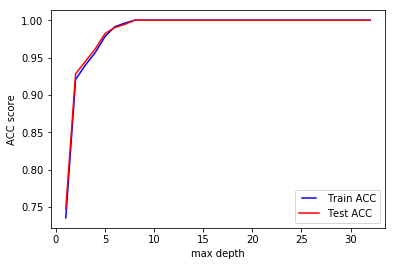

In [33]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    accuracy = accuracy_score(y_train,train_pred)
    train_results.append(accuracy)
    y_pred = rf.predict(X_test)
    accuracy2 = accuracy_score(y_test,y_pred)
    test_results.append(accuracy2)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train ACC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test ACC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('ACC score')
plt.xlabel('max depth')
plt.show()